In [1]:
import numpy as np


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y


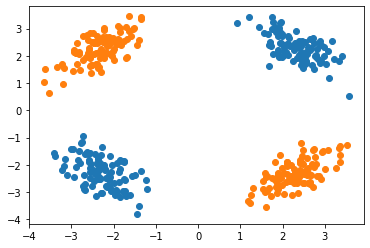

In [2]:
import matplotlib.pyplot as plt

X,y = gen_xor_distribution(400)

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

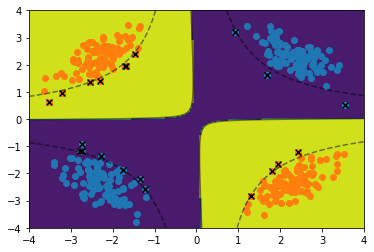

In [3]:
from sklearn.svm import SVC

svm = SVC(C=0.01, gamma='auto', kernel='poly', degree=2)
#svm = SVC(C=0.01, gamma='auto', kernel='linear')
#svm = SVC(C=0.01, gamma='auto', kernel='poly', degree=4)
#svm = SVC(C=1000, gamma='auto', kernel='poly', degree=2)
#svm = SVC(C=0.1, gamma='auto', kernel='rbf')
#svm = SVC(C=10, gamma='auto', kernel='rbf')

svm.fit(X, y)

r = 4
npx = 200
npy = 200
x1line = np.linspace(-r, r, npx)
x2line = np.linspace(-r, r, npy)
x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

class_vals = svm.predict(Xgrid)
class_vals = np.reshape(class_vals, [npx, npy])

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, class_vals)
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])
Z = np.reshape(svm.decision_function(Xgrid), [npx, npy])
ax.contour(x1line, x2line, Z, colors='k', levels=[-1, 0, 1], 
			alpha=0.5, linestyles=['--', '-', '--'])

sv = svm.support_vectors_

ax.scatter(sv[:,0],sv[:,1], marker="x", c="#000000")

(-10.0, 10.0)

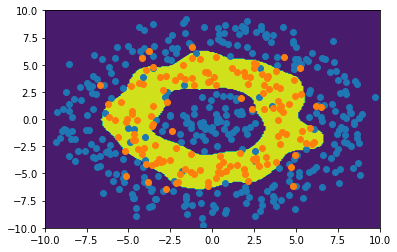

In [4]:
X,y = gen_circular_distribution(500)

#svm = SVC(C=1, gamma='auto', kernel='poly', degree=4)
svm = SVC(C=1, gamma='auto', kernel='rbf')

svm.fit(X, y)

r = 10
npx = 200
npy = 200
x1line = np.linspace(-r, r, npx)
x2line = np.linspace(-r, r, npy)
x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

class_vals = svm.predict(Xgrid)
class_vals = np.reshape(class_vals, [npx, npy])

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, class_vals)
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])
plt.xlim([-r, r])
plt.ylim([-r, r])

In [5]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

tot_correct_fraction_test = 0
tot_correct_fraction_train = 0
for train_index, test_index in kf.split(X):
  X_train = X[train_index]
  y_train = y[train_index]
  X_test = X[test_index]
  y_test = y[test_index]

  #use X_train, y_train to train the SVM
  svm = SVC(C=0.03, gamma='auto', kernel='rbf')
  #svm = SVC(C=0.2, gamma='auto', kernel='rbf')
  #svm = SVC(C=2, gamma='auto', kernel='rbf')
  #svm = SVC(C=20, gamma='auto', kernel='rbf')

  svm.fit(X_train,y_train)
  #use svm.predict() to predict the output for the test data set
  y_test_model = svm.predict(X_test)
  #loop through to compare the test data output to what it should be 
  #	and obtain the fraction of correct classifications)
  nTot = len(y_test) 
  nMatch = 0 
  for i in range(len(y_test)):
    if y_test[i] == y_test_model[i]:
      nMatch += 1
  
  correct_fraction_test = nMatch / nTot
  
  #do the same prediction and performance assessment performance 
  #	with the training data
  y_train_model = svm.predict(X_train)
  
  nTot = len(y_train) 
  nMatch = 0
  for i in range(len(y_train)):
    if y_train[i] == y_train_model[i]:
      nMatch += 1
      
  correct_fraction_train = nMatch / nTot
	
  #add on to the totals
  tot_correct_fraction_test += correct_fraction_test
  tot_correct_fraction_train += correct_fraction_train

print('Correct percentage for test data: ', 100*tot_correct_fraction_test/5)
print('Correct percentage for training data: ', 100*tot_correct_fraction_train/5)

Correct percentage for test data:  71.4
Correct percentage for training data:  71.4


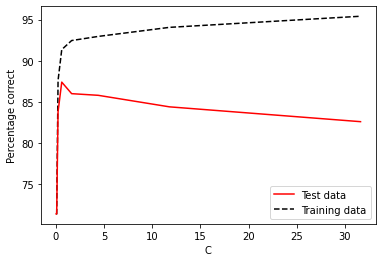

In [10]:
#now put all the above into a loop

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

C_array = np.power(10, np.linspace(-1.5, 1.5, 8))
nC = len(C_array)
test_cor_array = np.zeros([nC,1])
train_cor_array = np.zeros([nC,1])

for cCnt in range(nC):
  tot_correct_fraction_test = 0
  tot_correct_fraction_train = 0
  for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    #use X_train, y_train to train the SVM
    svm = SVC(C=C_array[cCnt], gamma='auto', kernel='rbf')

    svm.fit(X_train,y_train)
    #use svm.predict() to predict the output for the test data set
    y_test_model = svm.predict(X_test)
    #loop through to compare the test data output to what it should be 
    #	and obtain the fraction of correct classifications)
    nTot = len(y_test) 
    nMatch = 0 
    for i in range(len(y_test)):
      if y_test[i] == y_test_model[i]:
        nMatch += 1
    
    correct_fraction_test = nMatch / nTot
    
    #do the same prediction and performance assessment performance 
    #	with the training data
    y_train_model = svm.predict(X_train)
    
    nTot = len(y_train) 
    nMatch = 0
    for i in range(len(y_train)):
      if y_train[i] == y_train_model[i]:
        nMatch += 1
        
    correct_fraction_train = nMatch / nTot
    
    #add on to the totals
    tot_correct_fraction_test += correct_fraction_test
    tot_correct_fraction_train += correct_fraction_train

  #print('Correct percentage for test data: ', 100*tot_correct_fraction_test/n_splits)
  #print('Correct percentage for training data: ', 100*tot_correct_fraction_train/n_splits)
  test_cor_array[cCnt] = 100*tot_correct_fraction_test/n_splits
  train_cor_array[cCnt] = 100*tot_correct_fraction_train/n_splits  


plt.figure()
line_train, = plt.plot(C_array,train_cor_array,'k--', label = 'Training data')
line_test, = plt.plot(C_array,test_cor_array,'r-',label='Test data')
plt.xlabel('C')
plt.ylabel('Percentage correct')
plt.legend(handles=[line_test, line_train])